# Day-10 (Final EDA Case Study (End-to-End Project))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
print("\nShape:", df.shape)


Shape: (53940, 10)


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [6]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


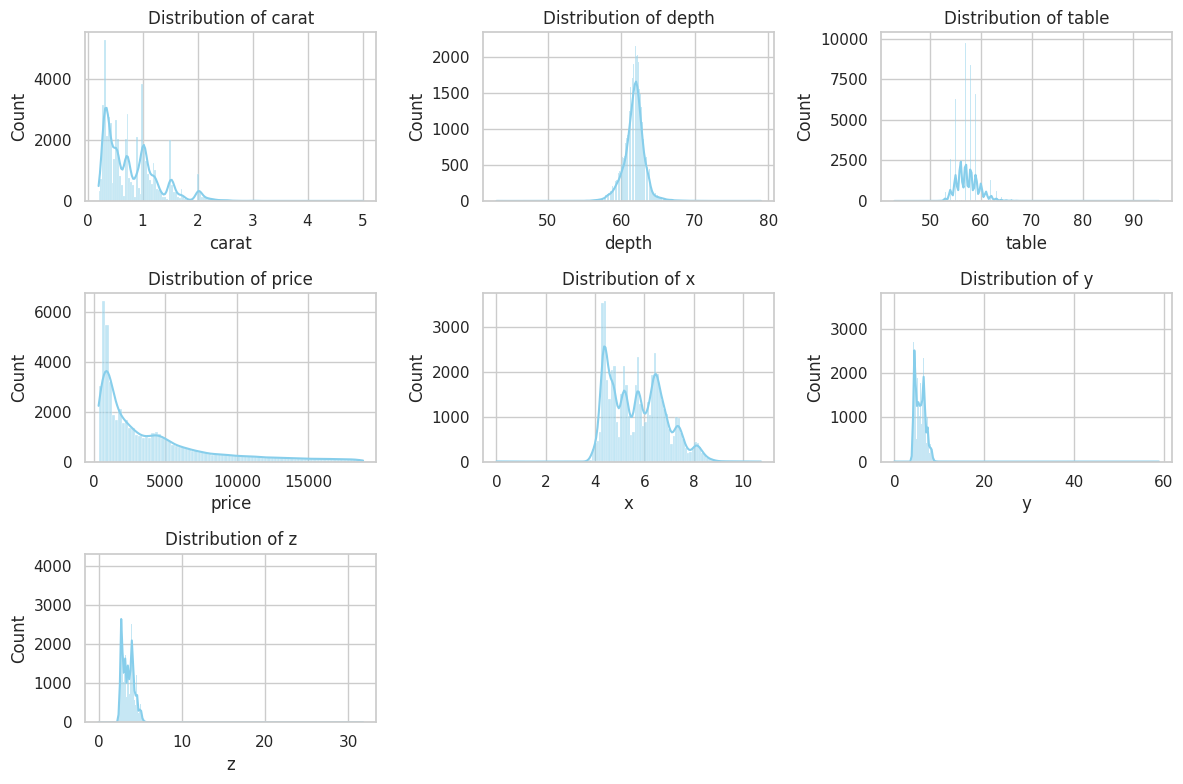

In [7]:
# Univariate analysis

num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2338386654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-2338386654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-2338386654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


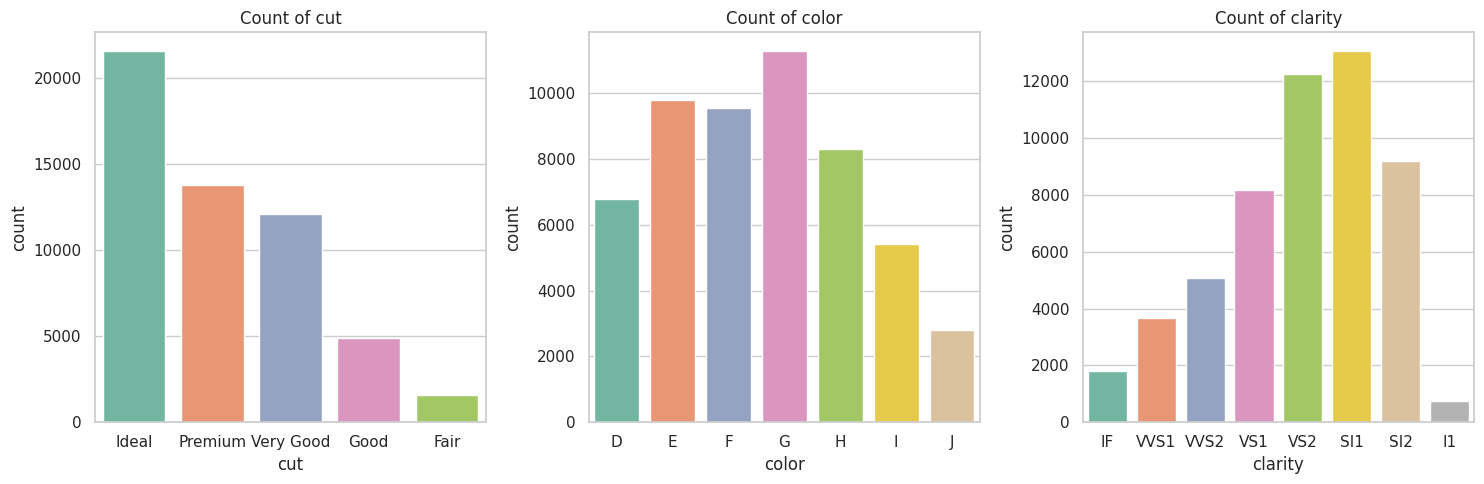

In [8]:
cat_cols = df.select_dtypes(include='category').columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count of {col}")
plt.tight_layout()
plt.show()

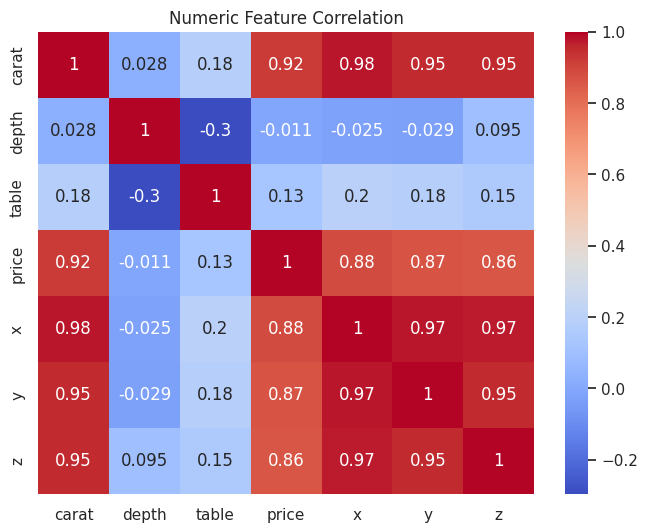

In [9]:
# bivariate analysis

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Numeric Feature Correlation")
plt.show()

/tmp/ipython-input-4147184674.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cut', y='price', palette='Set3')


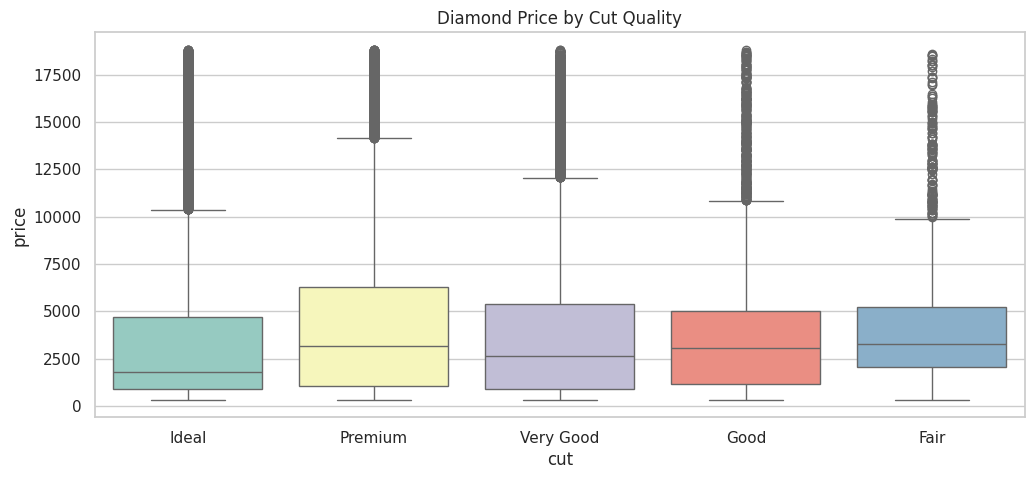

In [10]:
# price vs categorical features

plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='cut', y='price', palette='Set3')
plt.title("Diamond Price by Cut Quality")
plt.show()

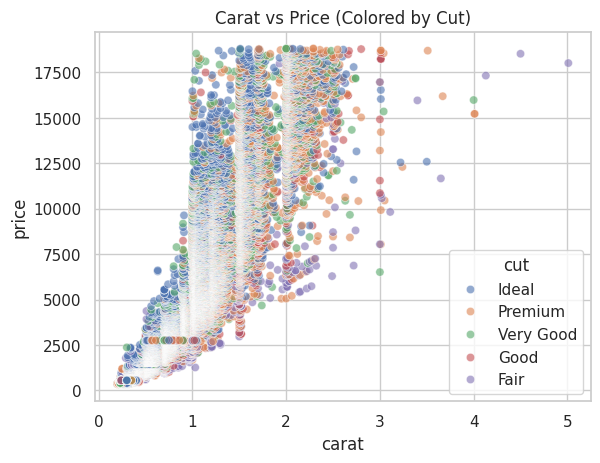

In [11]:
# price vs carat

sns.scatterplot(data=df, x='carat', y='price', hue='cut', alpha=0.6)
plt.title("Carat vs Price (Colored by Cut)")
plt.show()

In [12]:
# feature engineering

df['price_per_carat'] = df['price'] / df['carat']

df['price_log'] = np.log1p(df['price'])
df['carat_log'] = np.log1p(df['carat'])

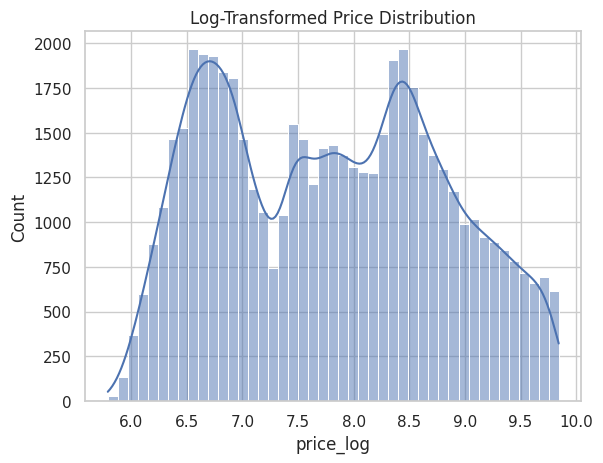

In [13]:
sns.histplot(df['price_log'], kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

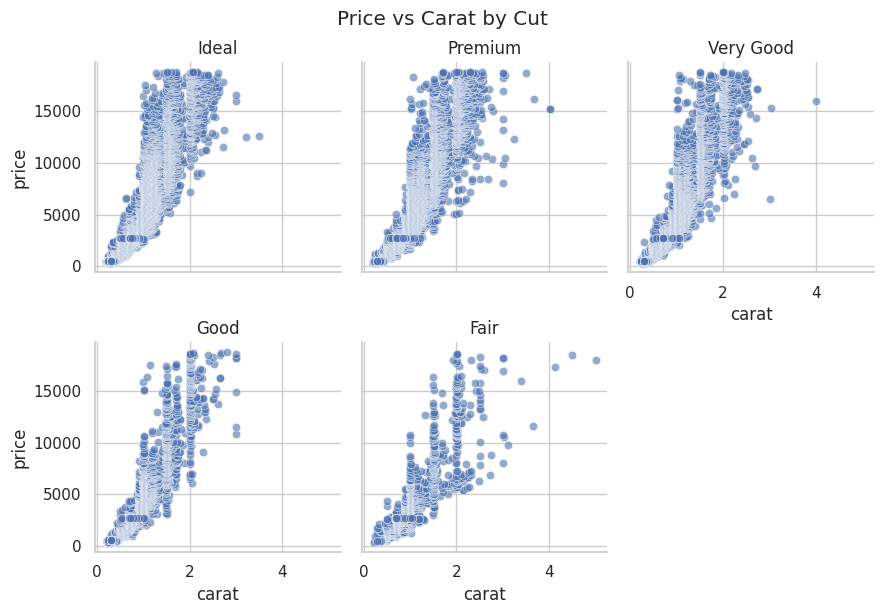

In [14]:
# Multivariate analysis

g = sns.FacetGrid(df, col="cut", col_wrap=3, height=3)
g.map_dataframe(sns.scatterplot, x="carat", y="price", alpha=0.6)
g.set_titles("{col_name}")
plt.suptitle("Price vs Carat by Cut", y=1.02)
plt.show()

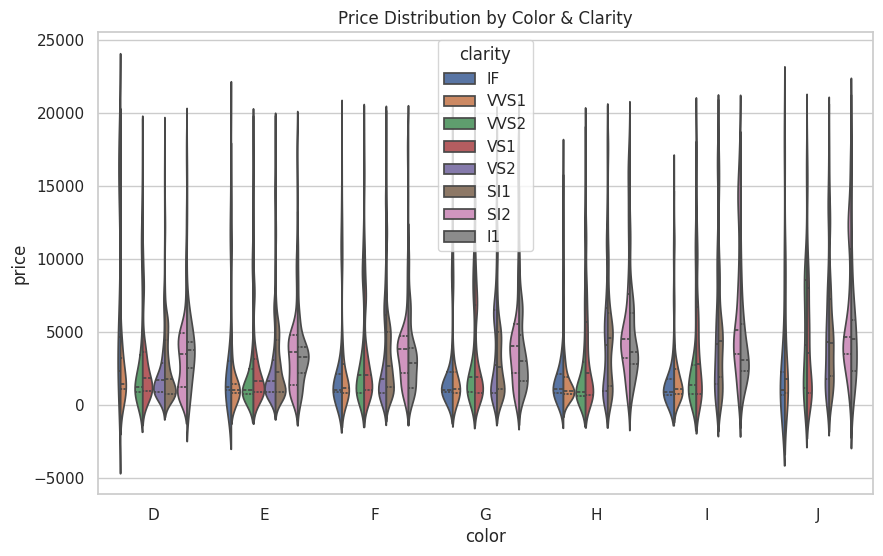

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="color", y="price", hue="clarity", split=True, inner="quartile")
plt.title("Price Distribution by Color & Clarity")
plt.show()

In [16]:
# detect outliers

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)
print("Outliers in price:", outlier_mask.sum())

Outliers in price: 3540


In [17]:
!pip install ydata-profiling

In [20]:
# Auto-EDA summary report
#from ydata_profiling import ProfileReport

#report = ProfileReport(df, title="Diamonds EDA Final Report", explorative=True)
#report.to_file("Diamonds_EDA_Final_Report.html")